# Estimation of rates of random events

> This notebook explores the estimation of rate from
> the times of random events generated by a Poisson processs.

Let's assume that $\{d_i\}$ is a set of $n$ samples distributed as $D \sim\operatorname{Exp}(\lambda)$.

Then, the can construct $n + 1$ times of random events $\{t_i\}$ as:

$$t_0 = 0, \quad t_i = \sum_{j=0}^{i-1} d_j \quad\textrm{for}\quad i > 1$$

These events are stochastic, statistically independent and have a fixed rate $\lambda$.

## Problem: how to estimate $\lambda$ from $\{t_i\}$?

Given $\{t_i\}$ we can trivially compute $\{d_i\}$ as:

$$d_i = t_{i+1} - t_i$$

Instead of $\lambda$, we can directly estimate $\tau = 1/\lambda$:

$$\hat{\tau} = \frac{1}{n}\sum_{i=0}^{n-1} d_i$$

The estimator $\hat{\tau} \sim \frac{1}{n}\operatorname{Erlang}(n, \lambda)$.
The Erlang distribution has mean $n/\lambda$ and variance $n/\lambda^2$.

Note that:

$$\hat{\tau} \sim \frac{1}{n}\operatorname{Erlang}(n, \lambda) = \operatorname{Erlang}(n, n\,\lambda)$$

thus, $\hat{\tau}$ has mean $1/\lambda$ and variance $1/(n \lambda)^2$, i.e.
it is an unbiased estimator of $1/\lambda$.

However, the fact the $\hat{\tau}$ is an unbiased estimator of $1/\lambda$ 
does not mean that $1/\hat{\tau}$ is an unbiased estimator of $\lambda$.

$$\hat{\lambda}^* = \frac{1}{\operatorname{Erlang}(n, n\,\lambda)}$$ 

$$\operatorname{E}[\hat{\lambda}^*] =\; ...$$

$$\textrm{Erlang PDF:}\quad f(x \:|\: n, \lambda) = 
\int \frac{\lambda^k x^{k-1} e^{-\lambda x}}{(k-1)!\,}\; {\rm d}x$$

$$\left\langle \frac{1}{\Delta t_m} \right\rangle = 
\int \frac{1}{x}\, f(x \:|\: m-1, \lambda)\; {\rm d}x = 
\int \frac{\lambda^{m-1} x^{m-2} e^{-\lambda x}}{(m-2)!\,}\; {\rm d}x = 
\frac{\lambda}{m-2} \qquad \textrm{(a)}
$$

$$\Rightarrow\quad \left\langle \frac{m - 2}{\Delta t_m} \right\rangle = \lambda$$

Therefore $\hat{\lambda} = \frac{m - 2}{\Delta t_m}$ is an unbiased estimator of $\lambda$.
To verify the integral in eq. (a) see 
[Verification of integral "a"](#Verification-of-integral-"a").

## Simulation of rate estimators performances

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In [182]:
n = 5                  # number of delays
num_times = n + 1      # number of timestamps
λ = 1000               # simulated rate 
num_iter = 100 * 1000

In [183]:
np.random.seed(1)
d1 = np.random.exponential(scale=1/λ, size=(num_iter * n)).reshape(num_iter, n)
t = np.cumsum(d1, axis=1)

assert np.allclose(np.cumsum(d1, axis=1), t)

We $n$ delays, exponentially distributed with a fixed rate. Their cumulative sum (the times) will not have a sharp cut-off: 

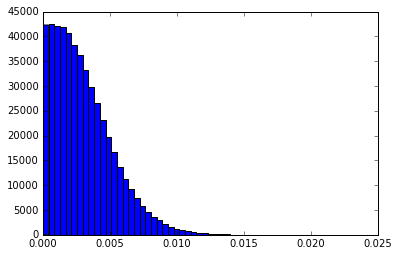

In [184]:
plt.hist(t.ravel(), bins=50);

The delays are exponential by construction:

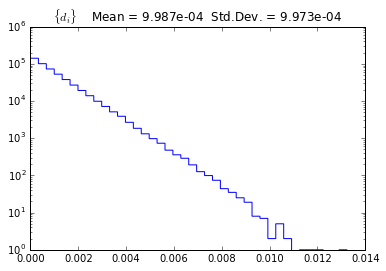

In [185]:
plt.hist(d1.ravel(), bins=40, histtype='step');
plt.yscale('log')
plt.title('$\{d_i\}\quad$ Mean = %.3e  Std.Dev. = %.3e ' % (d1.mean(), d1.std()));

Here we compare a set of estimators:

$$\hat{\lambda}_c = \frac{n - c}{\Delta t^{(n+1)}}$$

       c      n     Mean      Std   Err.RMS    Median    % > λ
    0.00      5  1.24925    71.73% 75.93874%  1.06955    55.92%
    0.33      5  1.16596    66.95% 68.97609%  0.99825    49.81%
    1.00      5  0.99940    57.39% 57.38548%  0.85564    36.98%
    2.00      5  0.74955    43.04% 49.79583%  0.64173    18.40%
    3.00      5  0.49970    28.69% 57.67396%  0.42782     5.18%
  median      5  1.94787   199.38%   220.76%     1.45    73.75%


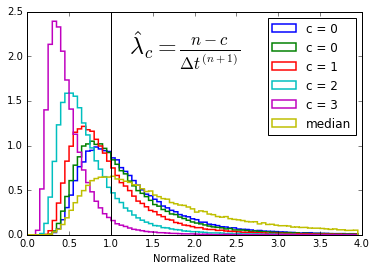

In [187]:
kws = dict(bins=np.arange(0, 4, 0.05), histtype='step', lw=1.5, normed=True)
print('{:>8} {:>6} {:>8} {:>8}  {:>8}  {:>8} {:>8}'
      .format('c', 'n', 'Mean', 'Std', 'Err.RMS', 'Median', '% > λ'))
for c in (0, 1/3, 1, 2, 3):
    r_hc = (n - c)  / d1.sum(axis=1) / λ
    r_hc_err_rms = np.sqrt(np.mean(((r_hc - 1)**2)))
    plt.hist(r_hc, **kws, label = 'c = %d' % c);
    print('%8.2f %6d %8.5f %8.2f%% %8.5f%% %8.5f %8.2f%%' % 
          (c, n, r_hc.mean(), r_hc.std()*100, r_hc_err_rms*100, np.median(r_hc),
           (r_hc > 1).sum() * 100 / num_iter))
    
r_hm = 1/np.median(d1, axis=1) / λ
r_hm_err_rms = np.sqrt(np.mean(((r_hm - 1)**2)))
plt.hist(r_hm, **kws, label = 'median');
print('%8s %6d %8.5f %8.2f%% %8.2f%% %8.2f %8.2f%%' % 
      ('median', n, r_hm.mean(), r_hm.std()*100, r_hm_err_rms*100, np.median(r_hm),
       (r_hm > 1).sum() * 100 / num_iter))

plt.legend()
plt.xlabel('Normalized Rate')
plt.axvline(1, color='k');
plt.text(0.36, 0.75, r'$\hat{\lambda}_c = \frac{n - c}{\Delta t^{(n+1)}}$',
         fontsize=24, transform=plt.gcf().transFigure);

We can observe that:

- with $c = 2$ we obtain the smallest RMS error in estimating the rate,
- with $c = 1$ we obtained the unbiased estimator of the rate (but higher RMS error)
- with $c = 0$, has the median closer to the true rate, and we corretly identify that 
  a rate $\ge \lambda$ 56% of times.
- with $c = 1/3$, the estimator has median equal to the true rate.

Let's see how $\hat{\tau}$ converges, reported as a rate for comparison:

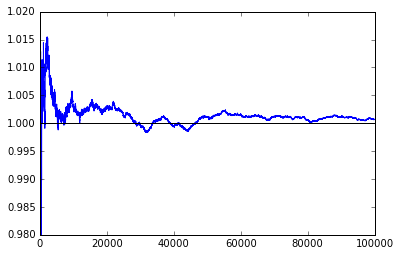

In [11]:
rate_t = 1 / ((d1.mean(axis=1)).cumsum() / np.arange(1, num_iter+1)) / λ

plt.plot(rate_t[100:])
plt.ylim(0.98, 1.02)
plt.axhline(1, color='k');

Let's see how $\hat{\lambda} = 1/\hat{\tau}$ converges:

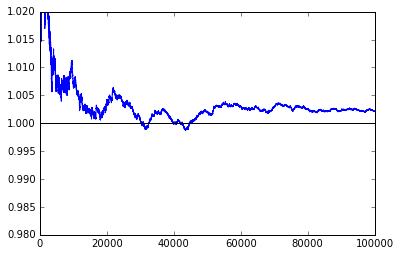

In [12]:
rate_t2 = ((n - 1) / d1.sum(axis=1)).cumsum() / np.arange(1, num_iter+1) / λ

plt.plot(rate_t2[100:])
plt.ylim(0.98, 1.02)
plt.axhline(1, color='k');

Beign unbiased estimators, both $\hat{\tau}$ and $\hat{\lambda}$ converge to $\tau$ and $\lambda$ respectively. In practice, when only $m$ photons are available to estimate $\lambda$, we obtain an unbiased estimation using $\hat{\lambda}$.

## Verification of integral "a"

In [68]:
from sympy import integrate, Symbol, factorial, exp, gamma
import sympy
sympy.init_printing()
import numpy as np

In [87]:
n = Symbol('n')
x = Symbol('x')
lam = Symbol('\lambda')

The integrand function is:

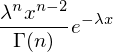

In [88]:
f = (lam**n * x**(n-2) * exp(-lam*x))/gamma(n)
f

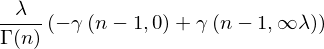

In [104]:
r = integrate(f, (x, 0, np.inf))
sympy.simplify(r)

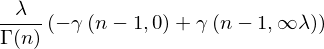

In [105]:
sympy.simplify(r)

Note that $\gamma$ is the [lower incomplete gamma function](https://en.wikipedia.org/wiki/Incomplete_gamma_function) and from its definition:

$$\gamma(n-1, 0) = 0$$ 
$$\gamma(n-1, \infty) = \Gamma(n-1)$$

Therefore the previous expression simplifies to:

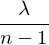

In [103]:
lam /(n - 1)

Finally, note that $n$ is the number of delays, while the number of photons is $m = n+1$.